In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('diabetes.csv')
x=data.iloc[:, [3,5]].values
y=data.iloc[:, [-1]].values

In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer.fit(x[:, 0:1])
x[:, 0:1] = imputer.transform(x[:, 0:1])

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
classifier.fit(x_train, y_train.ravel())

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [8]:
y_pred = classifier.predict(x_test)

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[100,  30],
       [ 49,  13]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


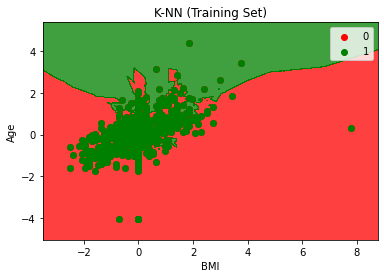

In [14]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
# x_set
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop = x_set[:,0].max() + 1, step = 0.01),
                   np.arange(start=x_set[:, 1].min() - 1, stop = x_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[:, 0], x_set[:, 1],
             c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training Set)')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


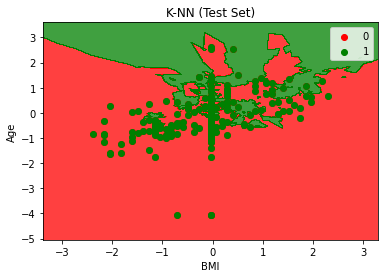

In [16]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
# x_set
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop = x_set[:,0].max() + 1, step = 0.01),
                   np.arange(start=x_set[:, 1].min() - 1, stop = x_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[:, 0], x_set[:, 1],
             c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test Set)')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.legend()
plt.show()